In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from itertools import combinations, chain
from collections import Counter

In [2]:
url = "http://www.mbnet.com.pl/dl.txt"
file = urllib.request.urlopen(url)
wyniki = [];

for line in file:
    linia = line.decode("utf-8")
    wyniki.append(linia)

In [3]:
len(wyniki)

6862

In [4]:
wyniki[-2]

'6861. 25.03.2023 3,12,19,31,40,43\r\n'

In [5]:
wyniki1 = []
for i in range(-1,-6001,-1):
    wyniki1.append(wyniki[i])

In [6]:
len(wyniki1)

6000

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("http://www.mbnet.com.pl/dl.txt", header = None, sep = "[, \s+]", engine = 'python')

In [9]:
wyniki2 = df.tail(6000)

In [10]:
len(wyniki2)

6000

In [11]:
df3 = pd.DataFrame(wyniki2)
df3.head()

,0,1,2,3,4,5,6,7
862,863.0,21.01.1973,6,13,17,18,23,33
863,864.0,28.01.1973,3,17,29,39,40,49
864,865.0,04.02.1973,6,18,27,29,43,45
865,866.0,04.02.1973,7,19,20,22,39,43
866,867.0,11.02.1973,5,18,21,28,29,33


In [12]:
df3.head(1)[1]

862    21.01.1973
Name: 1, dtype: object

In [13]:
df4 = df3.drop(columns = [0,1])
df4.head()

,2,3,4,5,6,7
862,6,13,17,18,23,33
863,3,17,29,39,40,49
864,6,18,27,29,43,45
865,7,19,20,22,39,43
866,5,18,21,28,29,33


In [14]:
df5 = df4.values.tolist()

In [15]:
a = list(combinations(df5[0], 2))
a

[(6, 13),
 (6, 17),
 (6, 18),
 (6, 23),
 (6, 33),
 (13, 17),
 (13, 18),
 (13, 23),
 (13, 33),
 (17, 18),
 (17, 23),
 (17, 33),
 (18, 23),
 (18, 33),
 (23, 33)]

In [16]:
len(df5)

6000

In [17]:
dwojki = []
for i in range(0,len(df5)):
    a = list(combinations(df5[i], 2))
    dwojki = dwojki + a

In [18]:
len(dwojki)

90000

In [19]:
c = Counter(dwojki)

In [20]:
najczestsze = list(c.most_common(20))
najczestsze

[((21, 39), 108),
 ((6, 42), 106),
 ((4, 20), 103),
 ((4, 27), 102),
 ((24, 41), 101),
 ((9, 18), 101),
 ((31, 42), 100),
 ((11, 34), 100),
 ((13, 37), 100),
 ((34, 36), 99),
 ((13, 22), 99),
 ((13, 15), 98),
 ((7, 46), 98),
 ((17, 21), 98),
 ((31, 34), 98),
 ((4, 29), 97),
 ((21, 41), 97),
 ((1, 17), 96),
 ((16, 24), 96),
 ((27, 30), 96)]

In [21]:
a1 = []
for i in range(0, 20):
    a1.append(najczestsze[i][0])

In [22]:
a11 = list(map(str, a1))
a11

['(21, 39)',
 '(6, 42)',
 '(4, 20)',
 '(4, 27)',
 '(24, 41)',
 '(9, 18)',
 '(31, 42)',
 '(11, 34)',
 '(13, 37)',
 '(34, 36)',
 '(13, 22)',
 '(13, 15)',
 '(7, 46)',
 '(17, 21)',
 '(31, 34)',
 '(4, 29)',
 '(21, 41)',
 '(1, 17)',
 '(16, 24)',
 '(27, 30)']

In [23]:
a2 = []
for i in range(0, 20):
    a2.append(najczestsze[i][1])

In [24]:
import pandas as pd
import seaborn as sns

In [25]:
c1 = sns.color_palette("RdBu", len(a2))
for i in range(1,20):
    if a2[i]==a2[i-1]:
        c1[i]=c1[i-1]

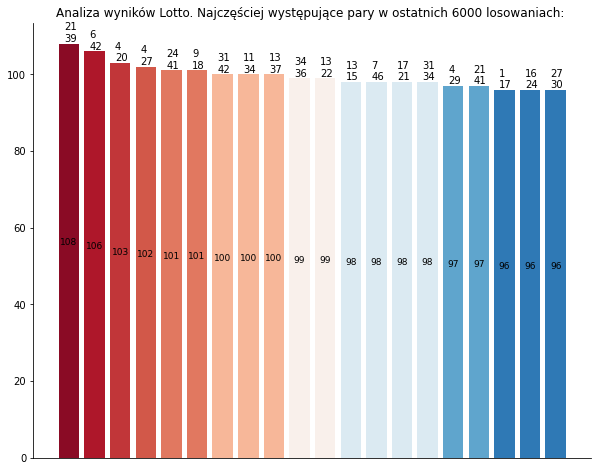

In [26]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()

plt.bar(a11, a2,color=c1, width = 0.8)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
ax.set_xticks([])
plt.title('Analiza wyników Lotto. Najczęściej występujące pary w ostatnich 6000 losowaniach: ')
for i in ax.patches:
    plt.annotate(format(i.get_height()),
                   (i.get_x() + i.get_width()/2,
                    i.get_height()/ 2), ha='center', va='center',
                   size=9, xytext=(0, 8),textcoords='offset points')  

for j in range(0,20):
        plt.text(x=j - 0.2 , y = a2[j] + 3.5, s = a1[j][0])
        plt.text(x=j - 0.2 , y = a2[j] + 0.5, s = a1[j][1])
        
plt.show()

In [27]:
for i in ax.patches:
    print(i)

Rectangle(xy=(-0.4, 0), width=0.8, height=108, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=106, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=103, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=102, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=101, angle=0)
Rectangle(xy=(4.6, 0), width=0.8, height=101, angle=0)
Rectangle(xy=(5.6, 0), width=0.8, height=100, angle=0)
Rectangle(xy=(6.6, 0), width=0.8, height=100, angle=0)
Rectangle(xy=(7.6, 0), width=0.8, height=100, angle=0)
Rectangle(xy=(8.6, 0), width=0.8, height=99, angle=0)
Rectangle(xy=(9.6, 0), width=0.8, height=99, angle=0)
Rectangle(xy=(10.6, 0), width=0.8, height=98, angle=0)
Rectangle(xy=(11.6, 0), width=0.8, height=98, angle=0)
Rectangle(xy=(12.6, 0), width=0.8, height=98, angle=0)
Rectangle(xy=(13.6, 0), width=0.8, height=98, angle=0)
Rectangle(xy=(14.6, 0), width=0.8, height=97, angle=0)
Rectangle(xy=(15.6, 0), width=0.8, height=97, angle=0)
Rectangle(xy=(16.6, 0), width=0.8, height=96, angle=0)
Rectangle(x

In [28]:
p0 = 0
p1 = 0
p2 = 0
p3 = 0
p4 = 0
p5 = 0
p6 = 0
for i in range(0,len(df5)):
    p = 0
    np = 0
    for j in range(0,6):
        if(df5[i][j]%2==0):
            p = p + 1
        else: np = np + 1
    if (p==6):
        p6 = p6 +1
    if (p==5):
        p5 = p5 +1
    if (p==4):
        p4 = p4 +1
    if (p==3):
        p3 = p3 +1
    if (p==2):
        p2 = p2 +1
    if (p==1):
        p1 = p1 +1
    if (p==0):
        p0 = p0 +1

In [29]:
p0+p1+p2+p3+p4+p5+p6

6000

In [30]:
p00 = p0/6000
p01 = p1/6000
p02 = p2/6000
p03 = p3/6000
p04 = p4/6000
p05 = p5/6000
p06 = p6/6000

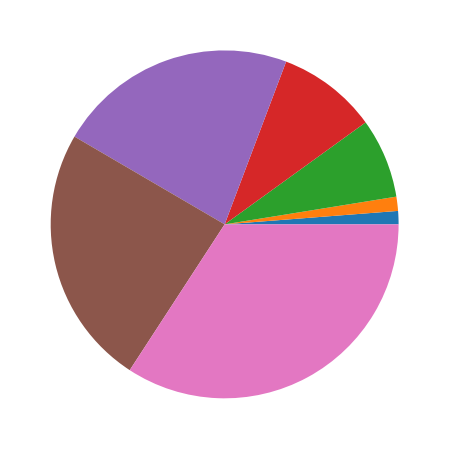

In [31]:
plt.figure(figsize=(8,8))

# x = [p00,p01,p02,p03,p04,p05,p06]
x = [p0,p1,p2,p3,p4,p5,p6]
x1 = sorted(x)

plt.pie(x1)



plt.show()

In [32]:
n = list(c.most_common())
l = len(n)
sum = 0
for i in range(0, l):
    sum = sum + n[i][1]

linia = sum/l

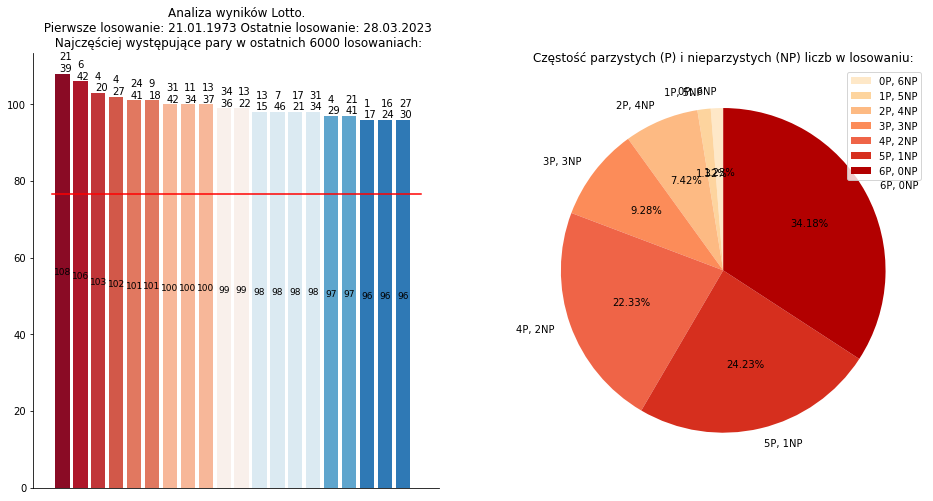

In [33]:
fig = plt.figure(figsize=(16,8))


ax1 = plt.subplot(1,2,1)
ax1.plot([-0.6,20],[linia,linia],"-",color='red',zorder=10)
plt.bar(a11, a2,color=c1, width = 0.8)
for s in ['top', 'right']:
    ax1.spines[s].set_visible(False)
ax1.set_xticks([])
plt.title('Analiza wyników Lotto.' +
          '\n Pierwsze losowanie: ' + df3.head(1)[1].item() + ' Ostatnie losowanie: ' + df3.tail(1)[1].item() +
          '\n Najczęściej występujące pary w ostatnich 6000 losowaniach:')
for i in ax1.patches:
    plt.annotate(format(i.get_height()),
                   (i.get_x() + i.get_width()/2,
                    i.get_height()/ 2), ha='center', va='center',
                   size=9, xytext=(0, 8),textcoords='offset points')  

for j in range(0,20):
        plt.text(x=j - 0.2 , y = a2[j] + 3.5, s = a1[j][0])
        plt.text(x=j - 0.2 , y = a2[j] + 0.5, s = a1[j][1])   

 
c2 = list(sns.color_palette("OrRd", 7))
ax2=plt.subplot(122)
#x = [p00,p01,p02,p03,p04,p05,p06]
x = [p0,p1,p2,p3,p4,p5,p6]
x1 = sorted(x)
labels = ["0P, 6NP","1P, 5NP", "2P, 4NP", "3P, 3NP", "4P, 2NP", "5P, 1NP", "6P, 0NP" ]
plt.pie(x1, labels = labels, autopct='%1.2f%%', colors = c2, startangle=90)
plt.title("Częstość parzystych (P) i nieparzystych (NP) liczb w losowaniu:")
plt.legend()



plt.savefig("06_Tab_272348")    
plt.show()